In [18]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv("spam.csv")
df["spam"]=df["Category"].apply(lambda x:1 if x=="spam" else 0)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_features=3000)
X = vectorizer.fit_transform(df["Message"])
y = df["spam"]


In [14]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 37100 stored elements and shape (5572, 3000)>

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [22]:
model_dt=DecisionTreeClassifier(max_depth=10,random_state=42)
model_knn=KNeighborsClassifier(n_neighbors=5)
model_nb = MultinomialNB()

In [23]:
model_dt.fit(X_train,y_train)
model_knn.fit(X_train,y_train)
model_nb.fit(X_train, y_train)

MultinomialNB()

In [24]:
def evaluate_model(name, model, X_test, y_test):
   
    y_pred = model.predict(X_test)

    
    y_prob = model.predict_proba(X_test)[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    print(f"\n{name} Results")
    print("-" * 30)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("ROC-AUC:", roc)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return precision, recall, f1, roc



KNN classifier Results
------------------------------
Precision: 1.0
Recall: 0.436241610738255
F1-score: 0.6074766355140186
ROC-AUC: 0.8507232481554046

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.44      0.61       149

    accuracy                           0.92      1115
   macro avg       0.96      0.72      0.78      1115
weighted avg       0.93      0.92      0.91      1115



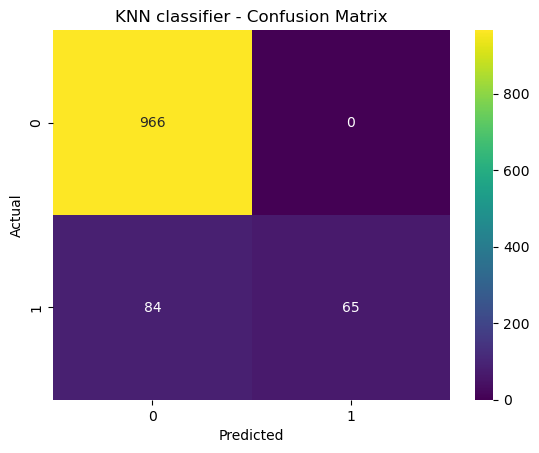


Decision Tree Results
------------------------------
Precision: 0.9714285714285714
Recall: 0.6845637583892618
F1-score: 0.8031496062992126
ROC-AUC: 0.8602623424625176

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.97      0.68      0.80       149

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



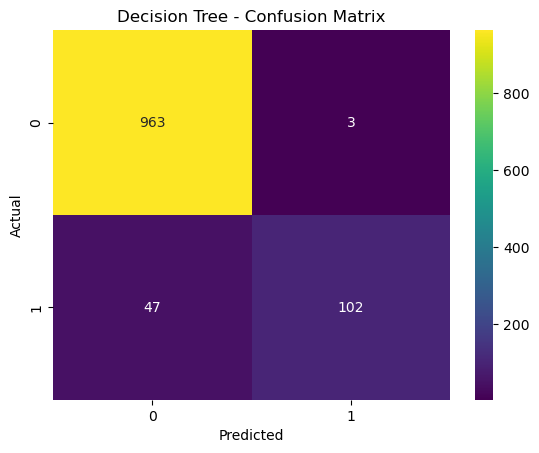


Naive bayes Results
------------------------------
Precision: 1.0
Recall: 0.8926174496644296
F1-score: 0.9432624113475178
ROC-AUC: 0.9863409618297275

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



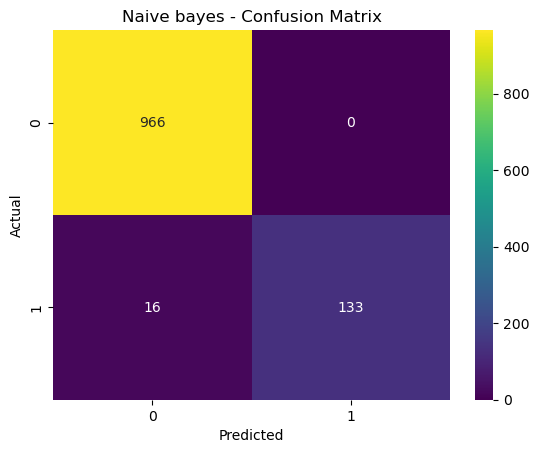

In [25]:
knn=evaluate_model("KNN classifier",model_knn,X_test,y_test)
dt=evaluate_model("Decision Tree",model_dt,X_test,y_test)
nb=evaluate_model("Naive bayes",model_nb,X_test,y_test)